# TensorFlow Data

In [20]:
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
import matplotlib.pyplot as plt

Any machine learning model is composed of two primary components: model design and training data. While model design and architecture receive significant attention, any model is only as good as the data which it was trained on. We'll discuss how to prepare labeled training data in more detail later. Here we will focus on the most efficient way to wrangle your training data and feed it into a model.

TensorFlow has introduced the `tf.data` API to serve as an end-to-end pipeline for handling data in the context of machine learning. There are three primary steps in any pipeline: extract, train and load or ETL.

The core of the `tf.data` API is the `tf.data.Dataset` object, which supports each step of the ETL process. We will download the MNIST dataset to use as an example for this tutorial.

In [12]:
train, test = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [13]:
X, y = train
X.shape, y.shape

((60000, 28, 28), (60000,))

Text(0.5, 1.0, '5')

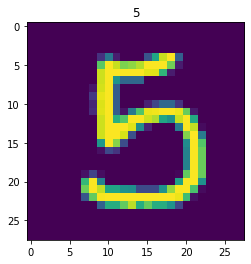

In [14]:
i = np.random.randint(X.shape[0])
fig,ax = plt.subplots()
ax.imshow(X[i])
ax.set_title(y[i])

## Extract
This step addresses the task of reading your dataset and passing it to the Dataset object. There are six different input methods available which are detailed in the [docs](https://www.tensorflow.org/guide/data#reading_input_data). When your dataset can be fully loaded into memory, it can be converted to a tensor and passed directly to the object.

In [19]:
dataset = tf.data.Dataset.from_tensor_slices((X,y))
dataset

<TensorSliceDataset shapes: ((28, 28), ()), types: (tf.uint8, tf.uint8)>

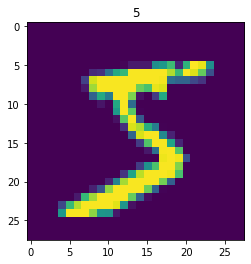

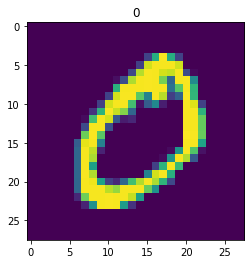

In [30]:
for im, label in dataset.take(2):
  fig,ax = plt.subplots()
  ax.imshow(im)
  ax.set_title(label.numpy())

## Transform
At this stage we can perform any transformations to our data prior to training. This can be as simple as shuffling the dataset prior to retrieving batches or applying random rotations for data augmentation.

https://www.tensorflow.org/tutorials/images/data_augmentation